# Case Study #2: Customer Orders 

**Note**: The code below was done in the order it took to find the variables. See the bottom of the page for a list of the variables in the order desired on the Word document 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

df = pd.read_csv('/Users/jakebodea/Projects/Full Stack Case Studies/casestudy.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [2]:
# Total revenue for the current year
yearly_revenue = {}
years = df['year'].unique().tolist()

for year in years:
    if year in yearly_revenue:
        pass
    else:
        yearly_revenue[year] = sum(df[df['year'] == year]['net_revenue'])
        
print('Total revenue per year:')
for year in yearly_revenue:
    print(">> {}: ${:,}".format(year, round(yearly_revenue[year], 2)))

Total revenue per year:
>> 2015: $29,036,749.19
>> 2016: $25,730,943.59
>> 2017: $31,417,495.03


In [3]:
# Total customers for current/previous year

yearly_customers = {}
for year in years: 
    if year in yearly_customers:
        pass 
    else:
        yearly_customers[year] = df[df['year'] == year]['customer_email'].tolist()

print('Number of customers per year:')
for year in yearly_revenue:
    print(">> {}: {:,}".format(year, len(yearly_customers[year])))

Number of customers per year:
>> 2015: 231,294
>> 2016: 204,646
>> 2017: 249,987


In [4]:
custs_2015 = df[df['year'] == 2015]
custs_2016 = df[df['year'] == 2016]
custs_2017 = df[df['year'] == 2017]

# creating a dataframe for all customers in 2016 that were also present in 2015
return_2016 = custs_2016.merge(custs_2015, how='inner', on=['customer_email'], suffixes=('_2016', '_2015'))

In [5]:
# creating a dataframe for all customers in 2017 that were present in either 2016 or 2015 or both
return_2017 = custs_2017.merge(custs_2016, how='inner', on=['customer_email'], suffixes=('_2017', '_2016'))
temp_2017 = custs_2017.merge(custs_2015, how='inner', on=['customer_email'], suffixes=('_2017', '_2015'))
return_2017 = return_2017.merge(temp_2017, how ='outer', on=['customer_email', 'net_revenue_2017', 'year_2017'])
return_2017.head()

,customer_email,net_revenue_2017,year_2017,net_revenue_2016,year_2016,net_revenue_2015,year_2015
0,yixtbjnxce@gmail.com,133.86,2017,201.32,2016.0,NaN,NaN
1,gwqjyelgct@gmail.com,164.10,2017,14.62,2016.0,NaN,NaN
2,hxshgpdxtr@gmail.com,178.10,2017,217.35,2016.0,180.59,2015.0
3,gipqsrvngd@gmail.com,172.90,2017,156.06,2016.0,122.71,2015.0
4,cdvwonzpwu@gmail.com,102.46,2017,140.43,2016.0,NaN,NaN


In [6]:
print("Existing customer revenue per year:")
print(">> 2016: ${:,}".format(round(sum(return_2016['net_revenue_2016']),2)))
print(">> 2017: ${:,}".format(round(sum(return_2017['net_revenue_2017']),2)))

Existing customer revenue per year:
>> 2016: $7,485,452.58
>> 2017: $2,740,887.39


In [7]:
# Lost customers 
lost_customers = pd.concat([custs_2017, custs_2016, custs_2015]).drop_duplicates(keep=False)
# creates a series of all the customers and removes duplicates, leaving only the customers that had 
# one order. This can be adjusted to not include 2017 data if it is decided that 2017 should not be 
# considered a lost customer since there is no 2018 data. 


print('Number of lost customers:')
print(">> {:,}".format(len(lost_customers['customer_email'])))
print("(List can be accessed)")

Number of lost customers:
>> 685,927
(List can be accessed)


In [8]:
# New customers

# creating a df for all custs that were in 2016 but not in 2015
is_return = custs_2016['customer_email'].isin(custs_2015['customer_email'])
new_2016 = custs_2016.drop(custs_2016[is_return].index)


# creating a df for all custs that were in 2017 but not in 2016 or 2015
is_return = custs_2017['customer_email'].isin(df[df['year'] != 2017]['customer_email'])
new_2017 = custs_2017.drop(custs_2017[is_return].index)

print("Number of new customers:")
print(">> 2016: {:,}".format(len(new_2016)))
print(">> 2017: {:,}".format(len(new_2017)))
print("(List can be accessed)")

Number of new customers:
>> 2016: 145,062
>> 2017: 228,262
(List can be accessed)


In [9]:
# Existing customer growth 

print("Existing Customer Growth:")
print(">> ${:,}".format(round(sum(return_2017['net_revenue_2017']) - sum(return_2016['net_revenue_2016']), 2)))

Existing Customer Growth:
>> $-4,744,565.19


In [10]:
# New customer revenue 

# creating a df for all custs that were in 2017 but not in 2016 (ok if in 2015)
is_return = custs_2017['customer_email'].isin(custs_2016['customer_email'])
new_2017_2015ok = custs_2017.drop(custs_2017[is_return].index)

# Note: len(new_2017) = 228,262 and len(new_2017_2015ok) = 229,028; there are about 1000 customers 
# in 2017 that did not purchase anything in 2016 but did in 2015 that are labelled as "new"

print("New Customer Revenue:")
print(">> ${:,}".format(round(sum(new_2016['net_revenue']) + sum(new_2017_2015ok['net_revenue']), 2)))

New Customer Revenue:
>> $47,021,726.05


In [11]:
# Revenue lost from attrition

print("Revenue Lost from Attrition:")
print(">> ${:,}".format(round(sum(lost_customers['net_revenue']), 2)))

Revenue Lost from Attrition:
>> $86,185,187.81


In [12]:
print('Total revenue per year:')
for year in yearly_revenue:
    print(">> {}: ${:,}".format(year, round(yearly_revenue[year], 2)))

print()

print("New Customer Revenue:")
print(">> ${:,}".format(round(sum(new_2016['net_revenue']) + sum(new_2017_2015ok['net_revenue']), 2)))

print()

print("Existing Customer Growth:")
print(">> ${:,}".format(round(sum(return_2017['net_revenue_2017']) - sum(return_2016['net_revenue_2016']), 2)))

print()

print("Revenue Lost from Attrition:")
print(">> ${:,}".format(round(sum(lost_customers['net_revenue']), 2)))

print()

print("Existing customer revenue per year:")
print(">> 2016: ${:,}".format(round(sum(return_2016['net_revenue_2016']),2)))
print(">> 2017: ${:,}".format(round(sum(return_2017['net_revenue_2017']),2)))

print()

print('Number of customers per year:')
for year in yearly_revenue:
    print(">> {}: {:,}".format(year, len(yearly_customers[year])))
    
print()

print("Number of new customers:")
print(">> 2016: {:,}".format(len(new_2016)))
print(">> 2017: {:,}".format(len(new_2017)))
print("(List can be accessed)")

print()

print('Number of lost customers:')
print(">> {:,}".format(len(lost_customers['customer_email'])))
print("(List can be accessed)")

Total revenue per year:
>> 2015: $29,036,749.19
>> 2016: $25,730,943.59
>> 2017: $31,417,495.03

New Customer Revenue:
>> $47,021,726.05

Existing Customer Growth:
>> $-4,744,565.19

Revenue Lost from Attrition:
>> $86,185,187.81

Existing customer revenue per year:
>> 2016: $7,485,452.58
>> 2017: $2,740,887.39

Number of customers per year:
>> 2015: 231,294
>> 2016: 204,646
>> 2017: 249,987

Number of new customers:
>> 2016: 145,062
>> 2017: 228,262
(List can be accessed)

Number of lost customers:
>> 685,927
(List can be accessed)


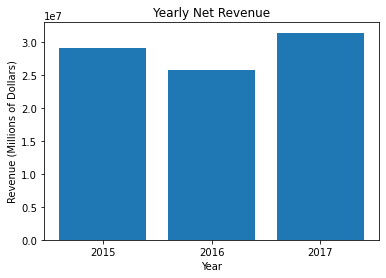

In [13]:
plt.bar(yearly_revenue.keys(), yearly_revenue.values())
plt.title("Yearly Net Revenue")
plt.xlabel("Year")
plt.xticks([2015, 2016, 2017])
plt.ylabel("Revenue (Millions of Dollars)")
plt.show()

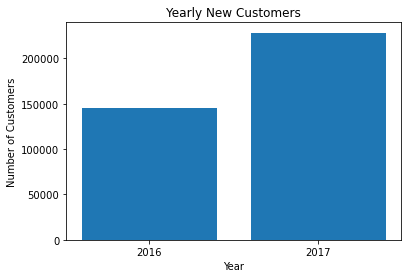

In [14]:
x = [2016, 2017]
y = [len(new_2016), len(new_2017)]

plt.bar(x, y)
plt.title("Yearly New Customers")
plt.xlabel("Year")
plt.xticks([2016, 2017])
plt.ylabel("Number of Customers")
plt.show()

While 2015 to 2016 saw a dropoff in revenue, 2017 saw a boost in new customers that reversed the downward revenue trend. Whatever marketing happened in 2017, it worked really well for the benefit of the company.